In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,4]
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

In [23]:
iris = datasets.load_iris(as_frame=True)
iris_X = iris.data
iris_y = iris.target
pd.concat([iris_X, iris_y], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


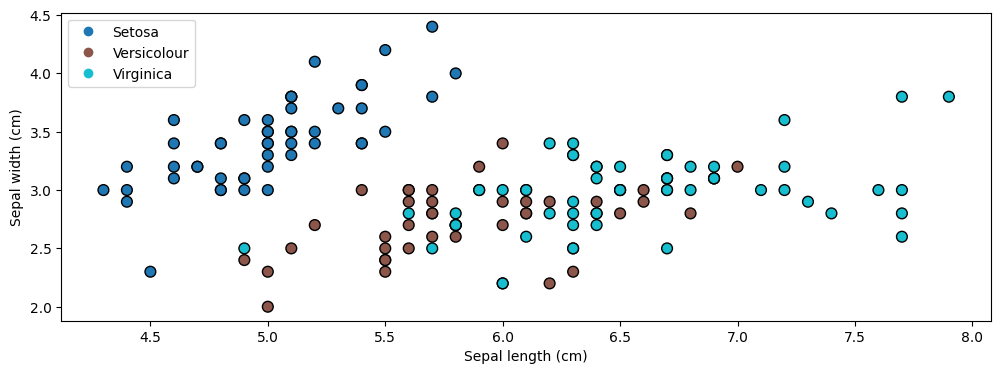

In [25]:
X = iris_X.to_numpy()[:, :2]
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
p1 = plt.scatter(X[:,0], X[:,1], c=iris_y, edgecolor='k', s=60, cmap=plt.cm.tab10)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='upper left')

In [26]:
n = X.shape[0] # size of the dataset
d = X.shape[1] # number of features
K = 3 # number of classes
mus = np.zeros([K,d])
sigmas = np.zeros([K,d,d])
phis = np.zeros([K])
for k in range(3):
  X_k = X[iris_y == k]
  mus[k] = np.mean(X_k, axis=0)
  # np.cov() - estimates the covariance matrix
  #    covariance - indicates the level to which two variables vary together
  sigmas[k] = np.cov(X_k.T)
  phis[k] = X_k.shape[0] / float(n)

In [27]:
mus

array([[5.006, 3.428],
       [5.936, 2.77 ],
       [6.588, 2.974]])

In [28]:
sigmas

array([[[0.12424898, 0.09921633],
        [0.09921633, 0.1436898 ]],

       [[0.26643265, 0.08518367],
        [0.08518367, 0.09846939]],

       [[0.40434286, 0.09376327],
        [0.09376327, 0.10400408]]])

In [29]:
phis

array([0.33333333, 0.33333333, 0.33333333])

In [39]:
def gda_predictions(X, mus, sigmas, phis):
  n, d = X.shape
  X = np.reshape(X, (1,n,d,1))
  mus = np.reshape(mus, (K,1,d,1))
  sigmas = np.reshape(sigmas, (K,1,d,d))
  # np.tile(A, reps) - construct an array by repeating A reps times
  py = np.tile(phis.reshape((K,1)), (1,n)).reshape([K,n,1,1])
  # np.matmul(a1,a2) - matrix product of two arrays
  # np.argmax(a,axis) - return the indeces of maximum values of the array a along the specified axis
  pxy = (np.sqrt(np.abs((2*np.pi)**d*np.linalg.det(sigmas))).reshape((K,1,1,1))*(-0.5)
         *np.exp(np.matmul(np.matmul((X-mus).transpose([0,1,3,2]), np.linalg.inv(sigmas)), X-mus)))
  pyx = pxy*py
  return np.argmax(pyx, axis=0).flatten(), pyx.reshape([K,n])

In [40]:
idx, pyx = gda_predictions(X, mus, sigmas, phis)
idx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

Text(0, 0.5, 'Sepal width (cm)')

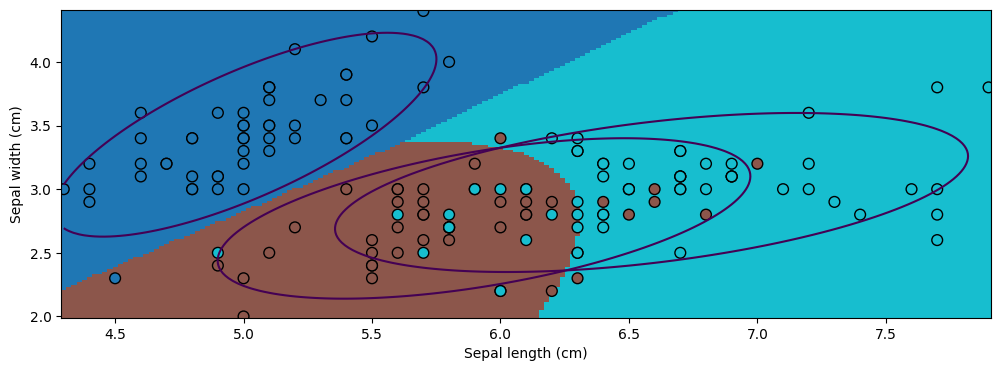

In [47]:
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.02), np.arange(ymin, ymax, 0.02))
Z, pyx = gda_predictions(np.c_[xx.ravel(), yy.ravel()], mus, sigmas, phis)
Z = Z.reshape(xx.shape)
logpy = np.log(-1./3*pyx)
contours = np.zeros([K, xx.shape[0], xx.shape[1]])
for k in range(K):
  contours[k] = logpy[k].reshape(xx.shape)
for k in range(K):
  # plt.contour(X,Y,Z,levels) - plot contour lines
  #     Z - the height values over which the contour is drawn
  #     levels - determines the number and positions of the contour lines
  plt.contour(xx, yy, contours[k], levels=np.logspace(0,1,1))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab10)
plt.scatter(X[:,0], X[:,1], c=iris_y, edgecolor='k', s=60, cmap=plt.cm.tab10)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')